<a href="https://colab.research.google.com/github/ZeyadWaleed7/Numerical-Methods-MATH-307-/blob/main/Bouns_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

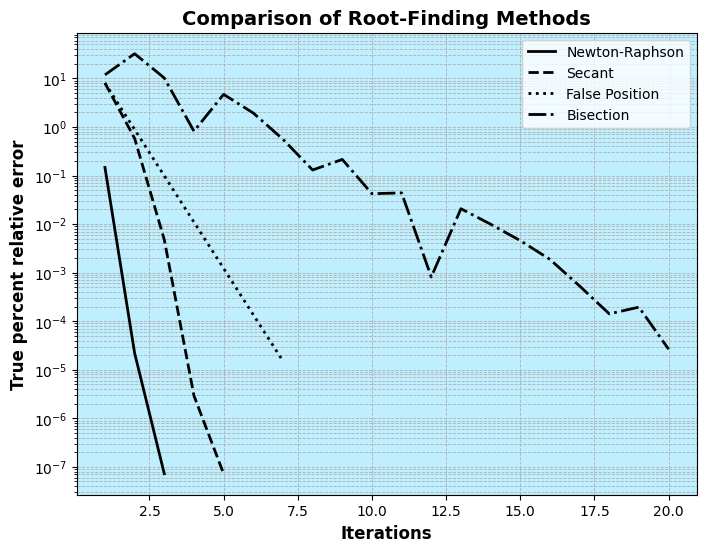

In [1]:
import numpy as np

import matplotlib.pyplot as plt



def f(x):
    return np.exp(-x) - x

def df(x):
    return -np.exp(-x) - 1

true_root = 0.56714329  # Known root for error calculations

def bisection_method(f, a, b, tol=1e-6, max_iter=20):
    errors = []
    for _ in range(max_iter):
        c = (a + b) / 2
        error = abs((true_root - c) / true_root) * 100
        errors.append(error)
        if f(c) == 0 or (b - a) / 2 < tol:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return errors

def false_position_method(f, a, b, tol=1e-6, max_iter=20):
    errors = []
    c = a
    for _ in range(max_iter):
        c_old = c
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        error = abs((true_root - c) / true_root) * 100
        errors.append(error)
        if abs(f(c)) < tol:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return errors

def secant_method(f, x0, x1, tol=1e-6, max_iter=20):
    errors = []
    for _ in range(max_iter):
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        error = abs((true_root - x2) / true_root) * 100
        errors.append(error)
        if abs(x2 - x1) < tol:
            break
        x0, x1 = x1, x2
    return errors

def newton_raphson(f, df, x0, tol=1e-6, max_iter=20):
    errors = []
    x = x0
    for _ in range(max_iter):
        x_new = x - f(x) / df(x)
        error = abs((true_root - x_new) / true_root) * 100
        errors.append(error)
        if abs(x_new - x) < tol:
            break
        x = x_new
    return errors

bisection_errors = bisection_method(f, 0, 1)
false_pos_errors = false_position_method(f, 0, 1)
secant_errors = secant_method(f, 0, 1)
newton_errors = newton_raphson(f, df, 0.5)

fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('white')
ax.set_facecolor('#BFEFFF')

ax.plot(range(1, len(newton_errors) + 1), newton_errors, label="Newton-Raphson", color='black', linewidth=2)
ax.plot(range(1, len(secant_errors) + 1), secant_errors, label="Secant", color='black', linestyle='dashed', linewidth=2)
ax.plot(range(1, len(false_pos_errors) + 1), false_pos_errors, label="False Position", color='black', linestyle='dotted', linewidth=2)
ax.plot(range(1, len(bisection_errors) + 1), bisection_errors, label="Bisection", color='black', linestyle='dashdot', linewidth=2)

ax.set_yscale("log")
ax.set_xlabel("Iterations", fontsize=12, fontweight='bold')
ax.set_ylabel("True percent relative error", fontsize=12, fontweight='bold')
ax.set_title("Comparison of Root-Finding Methods", fontsize=14, fontweight='bold')

ax.grid(True, which="both", linestyle="--", linewidth=0.6)
ax.legend()
plt.show()